In [14]:
#print(learning_curve(lrcv, X_train, Y_train,n_jobs=-1, cv=5, scoring='accuracy'))

In [15]:
'''import sys
!{sys.executable} -m pip install livelossplot'''

'import sys\n!{sys.executable} -m pip install livelossplot'

In [16]:
'''from livelossplot import PlotLossesKeras
from livelossplot import PlotLosses'''

'from livelossplot import PlotLossesKeras\nfrom livelossplot import PlotLosses'

In [17]:
'''import sys
!{sys.executable} -m pip install xgboost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, Y_train), (X_test,Y_test)]
# fit the model
model.fit(X_train, Y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(Y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()'''

"import sys\n!{sys.executable} -m pip install xgboost\nfrom sklearn.metrics import accuracy_score\nfrom xgboost import XGBClassifier\nmodel = XGBClassifier()\n# define the datasets to evaluate each iteration\nevalset = [(X_train, Y_train), (X_test,Y_test)]\n# fit the model\nmodel.fit(X_train, Y_train, eval_metric='logloss', eval_set=evalset)\n# evaluate performance\nyhat = model.predict(X_test)\nscore = accuracy_score(Y_test, yhat)\nprint('Accuracy: %.3f' % score)\n# retrieve performance metrics\nresults = model.evals_result()\n# plot learning curves\nplt.plot(results['validation_0']['logloss'], label='train')\nplt.plot(results['validation_1']['logloss'], label='test')\n# show the legend\nplt.legend()\n# show the plot\nplt.show()"

In [18]:
'''est=LogisticRegressionCV(cv=5,
                            random_state=1,
                            n_jobs=-1,
                            scoring='accuracy',
                            max_iter=300)
train_sizes, train_scores, test_scores = learning_curve(lrcv,
                                                         X_train, Y_train, cv=5, 
                                                         scoring='accuracy', n_jobs=-1,random_state=1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()'''

'est=LogisticRegressionCV(cv=5,\n                            random_state=1,\n                            n_jobs=-1,\n                            scoring=\'accuracy\',\n                            max_iter=300)\ntrain_sizes, train_scores, test_scores = learning_curve(lrcv,\n                                                         X_train, Y_train, cv=5, \n                                                         scoring=\'accuracy\', n_jobs=-1,random_state=1, train_sizes=np.linspace(0.01, 1.0, 50))\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\n\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\nplt.subplots(1, figsize=(10,10))\nplt.plot(train_sizes, train_mean, \'--\', color="#111111",  label="Training score")\nplt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")\nplt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")\nplt.fill_between(train_sizes

In [19]:
'''import sys
!{sys.executable} -m pip install gensim'''

'import sys\n!{sys.executable} -m pip install gensim'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [42]:
reviews=list()
for path, currentDirectory, files in os.walk("Desktop/txt_sentoken/pos/"):
    for file in files:
        txt=open(path+file,"r")
        review=txt.read()
        reviews.append(review)
        txt.close()
    pos_size=len(reviews)
for path, currentDirectory, files in os.walk("Desktop/txt_sentoken/neg/"):
    for file in files:
        txt=open(path+file,"r")
        review=txt.read()
        reviews.append(review)
        txt.close()
    neg_size=len(reviews)-pos_size

In [43]:
classes=np.ones((pos_size,1))
classes=np.append(classes,np.zeros((neg_size,1)), axis=0)

In [44]:
porter=PorterStemmer()
lemma=WordNetLemmatizer()
nltk.download('wordnet')
nltk.download("stopwords")
stop_words=stopwords.words("english")
def preprocessing(txt):
    txt=txt.lower()
    txt=txt.replace('\n',"")
    txt=txt.replace('(',"")
    txt=txt.replace(')',"")
    txt=txt.replace('.',"")
    txt=txt.replace('?',"")
    txt=txt.replace('!',"")
    txt=txt.replace(':',"")
    txt=txt.replace(',',"")
    txt=txt.replace('\\',"")
    txt=txt.replace('\"',"")
    txt=txt.replace('/',"")
    #txt=txt.replace('-',"")
    txt=txt.replace("'","")
    pattern = r'[0-9]'
    txt = re.sub(pattern, '', txt)
    return txt
def tokenize_stop_stem(txt):
    return [rev for rev in [porter.stem(word) for word in word_tokenize(txt)]if rev not in stop_words]
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
for i in range(len(reviews)): 
    reviews[i]=preprocessing(reviews[i])
    #reviews[i]=tokenize_stop_stem(reviews[i])

In [46]:
cv= CountVectorizer(ngram_range=(1,2),tokenizer=tokenize_stop_stem,binary=True,lowercase=False)
X_train, X_test, Y_train, Y_test = train_test_split(reviews, classes, random_state=1, test_size=0.3, shuffle=True)
cv.fit(X_train)
X_train=cv.transform(X_train)
X_test=cv.transform(X_test)
'''tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenize_stop_stem,
                        use_idf=True,ngram_range=(1,2),binary=True)
reviews = tfidf.fit_transform(reviews)'''

F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


'tfidf = TfidfVectorizer(lowercase=False,\n                        tokenizer=tokenize_stop_stem,\n                        use_idf=True,ngram_range=(1,2),binary=True)\nreviews = tfidf.fit_transform(reviews)'

In [47]:
svc=LinearSVC(penalty='l2', loss='squared_hinge',C=0.5, random_state=1, max_iter=300).fit(X_train, Y_train)
svc_score=svc.score(X_test,Y_test)*100
svc_predict=svc.predict(X_test)
print(svc_score)

87.33333333333333


F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [48]:
lrcv = LogisticRegressionCV(cv=5,
                            random_state=1,
                            n_jobs=-1,
                            scoring='accuracy',
                            max_iter=300).fit(X_train, Y_train)
Mulnb=MultinomialNB(alpha=0.1).fit(X_train, Y_train)
rccv = RidgeClassifierCV(cv=5,scoring='accuracy').fit(X_train, Y_train)
lr = LogisticRegression(random_state=1,max_iter=300, n_jobs=-1).fit(X_train, Y_train)
rccv_score=rccv.score(X_test,Y_test)*100
lr_score=lr.score(X_test,Y_test)*100
lrcv_score=lrcv.score(X_test,Y_test)*100
Mulnb_score=Mulnb.score(X_test,Y_test)*100

F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Mahmoud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

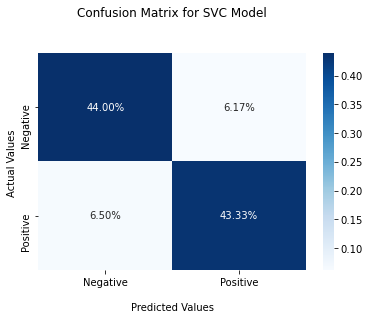

In [49]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, svc_predict)

import seaborn as sns

ax = sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for SVC Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

plt.show()

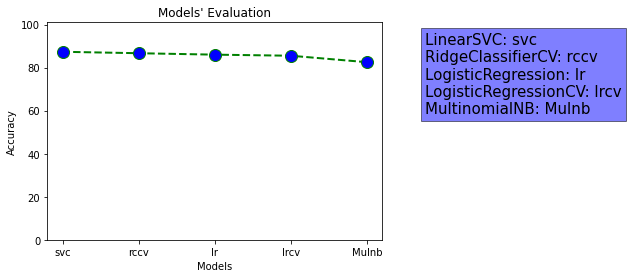

In [50]:
plt.plot(['svc','rccv' ,'lr','lrcv','Mulnb'],[svc_score,rccv_score,lr_score,lrcv_score,Mulnb_score], color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=12)
plt.figtext(1,0.7, '''LinearSVC: svc
RidgeClassifierCV: rccv
LogisticRegression: lr
LogisticRegressionCV: lrcv
MultinomialNB: Mulnb''', ha="left", va="center", fontsize=15,bbox={"facecolor":"blue", "alpha":0.5})
plt.ylim(0,101)
plt.title('Models\' Evaluation')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

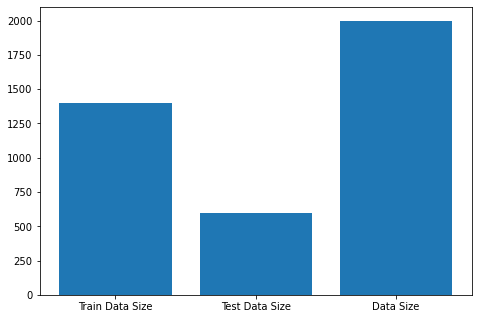

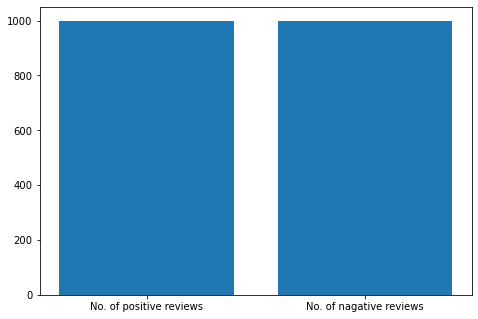

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Train Data Size', 'Test Data Size','Data Size']
sizes = [X_train.shape[0],X_test.shape[0],X_test.shape[0]+X_train.shape[0]]
ax.bar(labels,sizes)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels2 = ['No. of positive reviews', 'No. of nagative reviews']
sizes2 = [pos_size,neg_size]
ax.bar(labels2,sizes2)
plt.show()